In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [136]:
os.chdir('D:\\NCSA\\CPRHD')

In [273]:
data2010 = pd.read_csv('2010 combined.csv', low_memory = False)

In [274]:
cols = list(data2010.columns)

In [275]:
matching = []
for c in cols:
    if ("income" in c or "Income" in c or "INCOME" in c) and ("Margin of Error" not in c)\
    and ("Percent" not in c) and ("PERCENTAGE" not in c):
        matching.append(c)

In [276]:
data2010 = data2010[matching]

The below **info()** function describes if all the variables are either int or float or not, because they should be either **int or float**; if they are object type then it means there are some of the values which are missing and needs to check what kind of values are those.

In [277]:
data2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 44 columns):
Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Total households                                                                     1535 non-null int64
Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Less than $10,000                                                                    1535 non-null int64
Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - $10,000 to $14,999                                                                   1535 non-null int64
Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - $15,000 to $24,999                                                                   1535 non-null int64
Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - $25,000 to $34,999                                                                   1535 non-null int64
Estimate; INCOME AND BE

This shows that there are total of **15 columns/variables** which are having missing/non-numeric character.
<br>
<br>
Let us see in below dataframe, what kind of character it has

In [59]:
data2010_income.select_dtypes(include = object)

,Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Median household income (dollars),Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Mean household income (dollars),Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - With earnings - Mean earnings (dollars),Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - With Social Security - Mean Social Security income (dollars),Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - With retirement income - Mean retirement income (dollars),Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - With Supplemental Security Income - Mean Supplemental Security Income (dollars),Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - With cash public assistance income - Mean cash public assistance income (dollars),Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Median family income (dollars),Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Mean family income (dollars),Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars),Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Median nonfamily income (dollars),Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Mean nonfamily income (dollars),Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Median earnings for workers (dollars),"Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Median earnings for male full-time, year-round workers (dollars)","Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Median earnings for female full-time, year-round workers (dollars)"
0,36905,51153,59321,10351,11584,7607,1732,53731,62415,21824,22051,39541,29156,46276,36829
1,40681,52591,52390,15215,15371,7833,4418,44500,60001,22509,34875,43391,26819,40883,31429
2,35724,47699,52185,11200,20344,5798,590,57511,63907,19585,13036,22865,27188,46250,30304
3,45224,57075,59924,13844,21034,8405,3045,52162,68951,25393,37149,42368,32813,41559,41100
4,44018,58457,62651,13815,23600,6546,6852,72805,81038,26393,28795,45690,23369,41028,43750
5,33427,41715,45851,11791,9885,7620,8752,22328,41454,23384,36780,41000,29307,41458,31466
6,30330,53167,47965,13758,27448,7794,926,37036,72756,27606,25417,43620,19840,31037,43250
7,18250,34458,49909,11131,8984,5259,775,37036,74734,20198,15082,25691,15859,37317,27250
8,47610,59450,61982,12142,12816,6819,5463,60556,75129,25769,36719,44213,31130,45568,44853
9,55682,65714,68198,13291,18778,8445,1907,65699,78860,27162,37471,46783,30373,31475,40160


Now as we know that there are **hyphens and star** kind of character in the data, we can safely convert them to numeric and replace them with NA values so that later on we can do reqired imputations.

In [141]:
data2010 = data2010.apply(pd.to_numeric, errors='coerce')

In [71]:
income_missing_df = pd.DataFrame(data2010_income.isna().sum(), columns=['Total NaN'])
income_missing_df["Percentage of NaN"] = ((income_missing_df['Total NaN'])/(data2010_income.shape[0])*100)
income_missing_df[income_missing_df['Percentage of NaN']>0]

,Total NaN,Percentage of NaN
Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Median household income (dollars),6,0.390879
Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Mean household income (dollars),5,0.325733
Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - With earnings - Mean earnings (dollars),5,0.325733
Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - With Social Security - Mean Social Security income (dollars),10,0.651466
Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - With retirement income - Mean retirement income (dollars),25,1.628664
Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - With Supplemental Security Income - Mean Supplemental Security Income (dollars),193,12.573290
Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - With cash public assistance income - Mean cash public assistance income (dollars),299,19.478827
Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Median family income (dollars),9,0.586319
Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Mean family income (dollars),5,0.325733
Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars),5,0.325733


**As we see that there are very few data missing from the data, it can be safely say that we can impute the NaN values with the mean of resepctive columns**

In [142]:
data2010.fillna(data2010.mean(), inplace = True)

In [143]:
col = [l.split(' - ')[-1] for l in list(data2010.columns)]

In [145]:
data2010.rename(columns=dict(zip(matching, col)), inplace=True)

In [149]:
cor = data2010.corr()

In [184]:
cor_df = pd.DataFrame(cor.unstack().sort_values(kind="quicksort")).reset_index()

In [227]:
cor_df[(cor_df[0] > 0.88) & (cor_df[0] < 1)].sort_values(by=[0], ascending = False).drop_duplicates(subset = 0)

,level_0,level_1,0
1891,Mean household income (dollars),Mean earnings (dollars),0.987839
1889,"$200,000 or more.1","$200,000 or more",0.976242
1887,Total households,With earnings,0.971442
1885,Per capita income (dollars),Mean family income (dollars),0.953280
1883,"$150,000 to $199,999.1","$150,000 to $199,999",0.945772
1881,Mean family income (dollars),Mean household income (dollars),0.944269
1879,Mean earnings (dollars),Mean family income (dollars),0.940498
1877,Mean household income (dollars),Median household income (dollars),0.919325
1875,"$100,000 to $149,999.1","$100,000 to $149,999",0.916394
1873,Mean family income (dollars),Median family income (dollars),0.914627


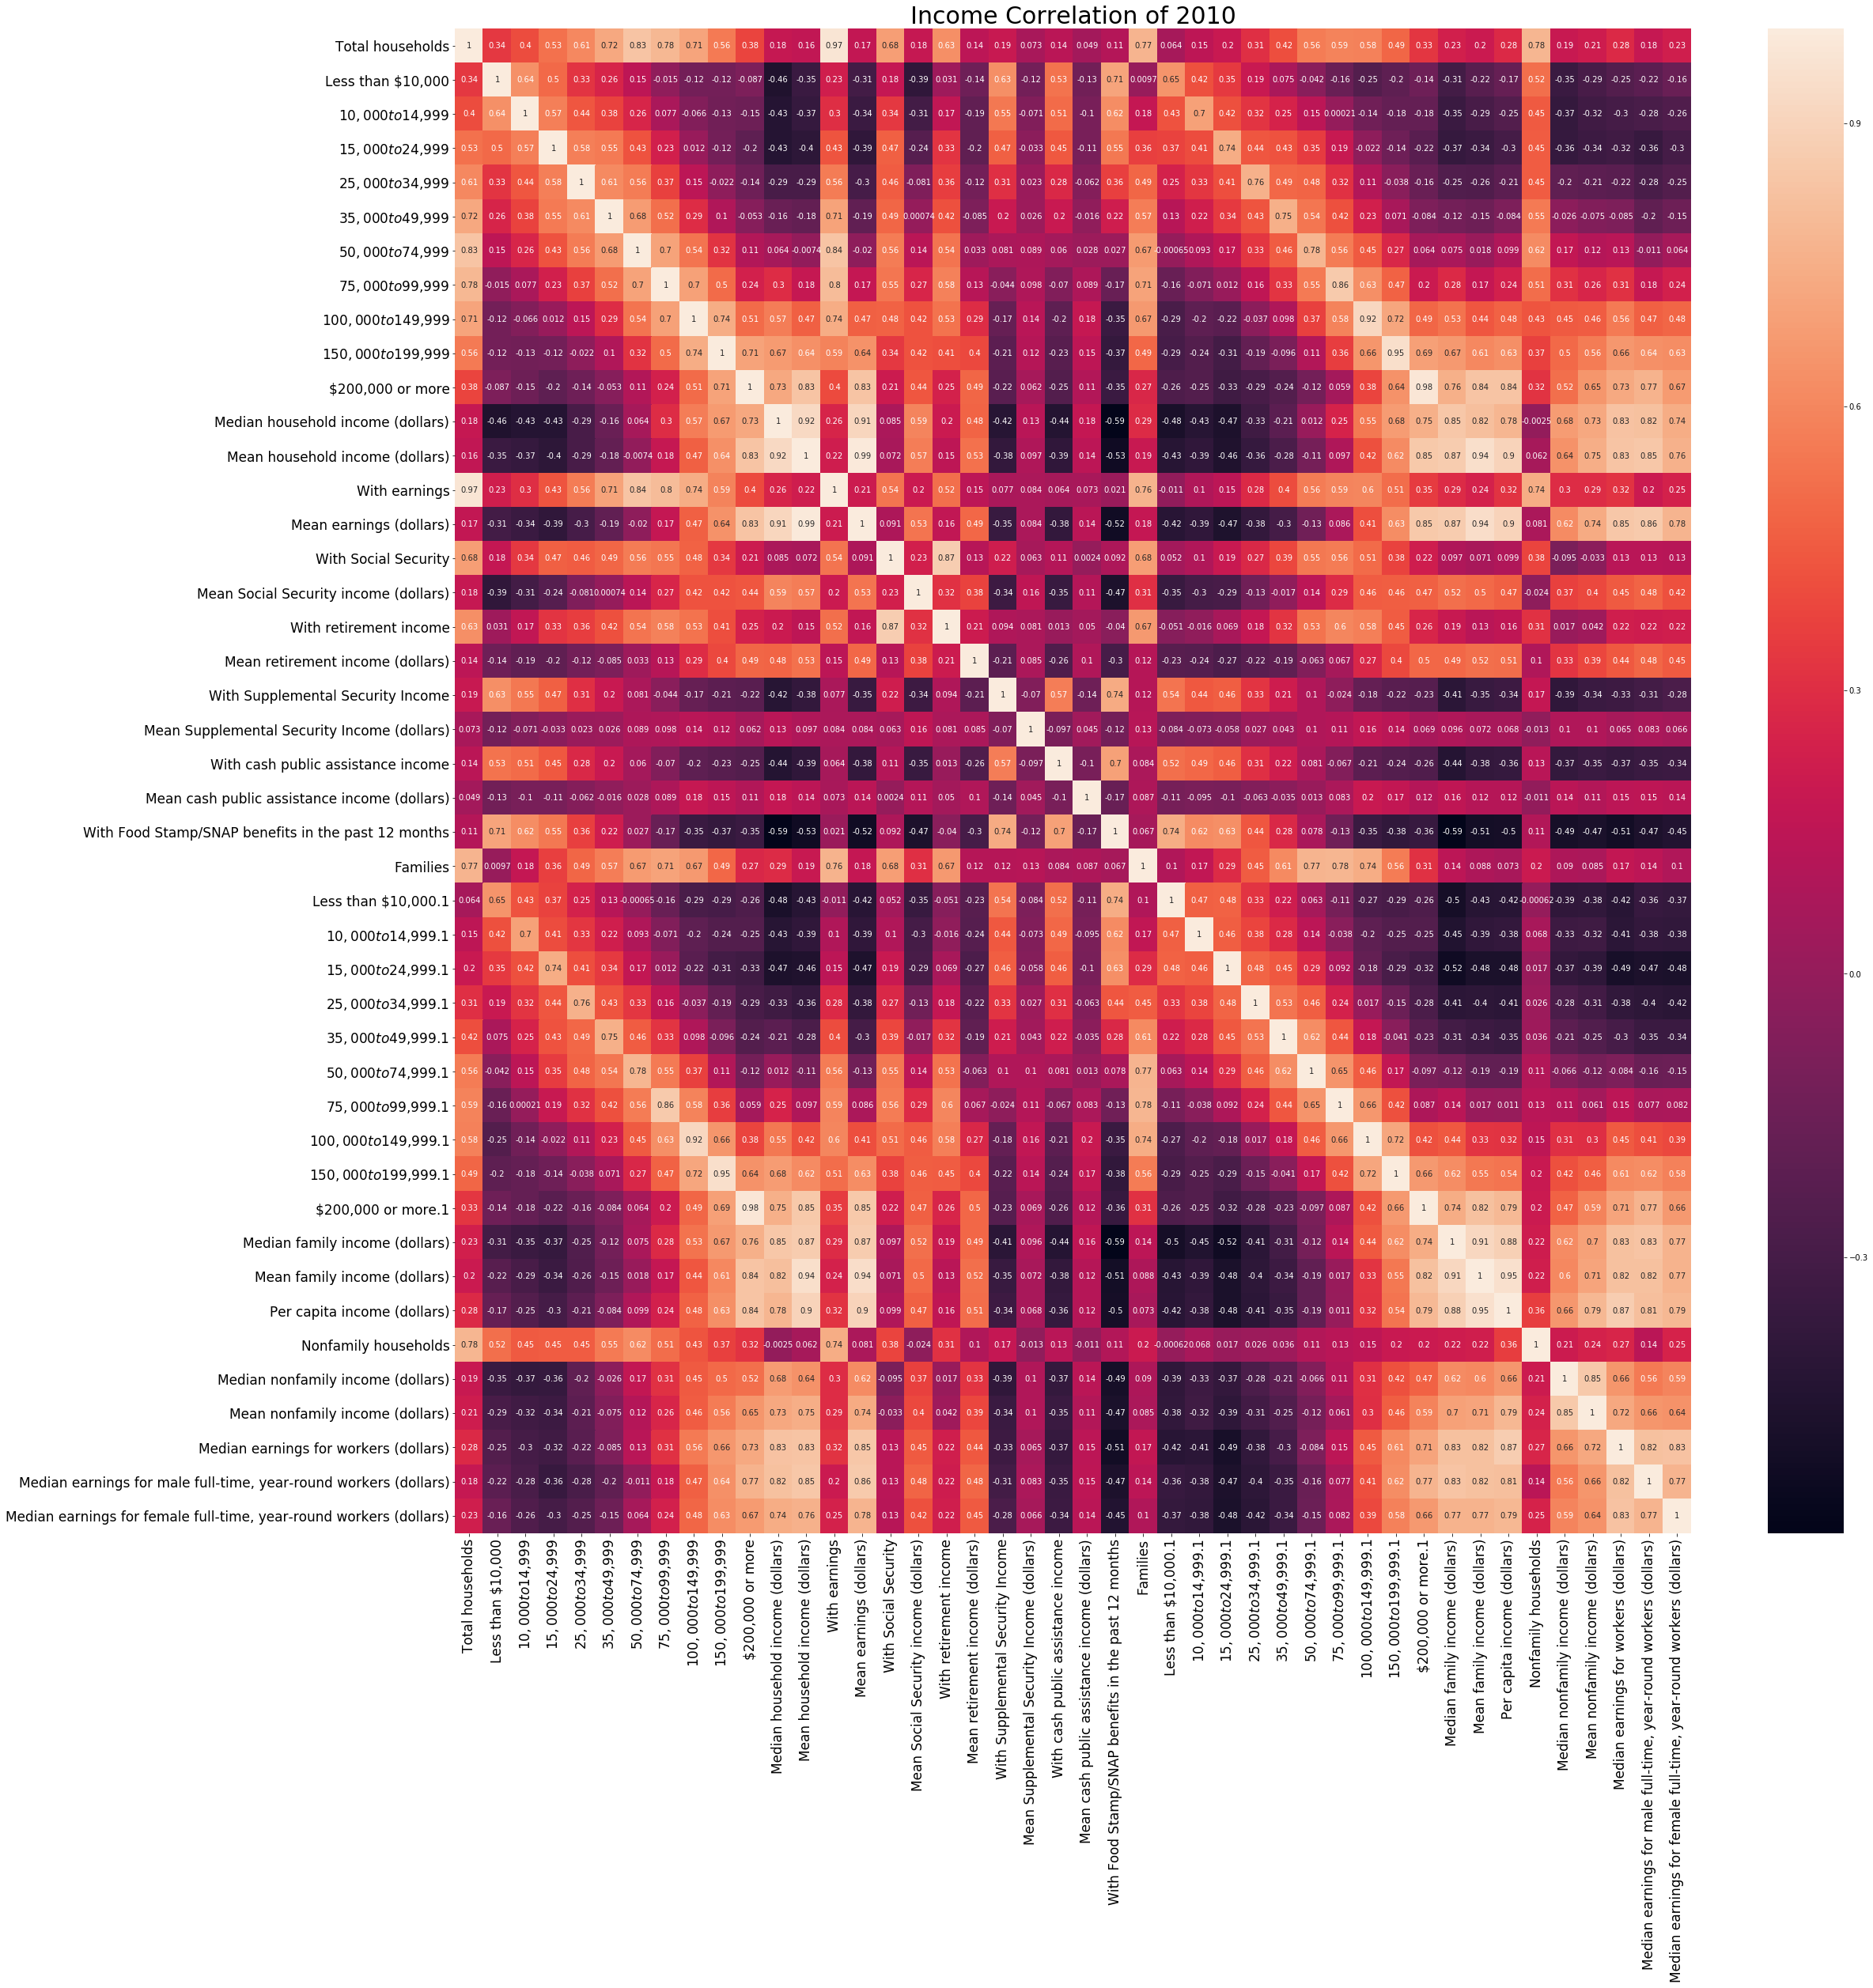

In [228]:
plt.figure(figsize = (35,35))
plt.title('Income Correlation of 2010', size = 30)
plt.xticks(size = 17)
plt.yticks(size = 17)
sns.heatmap(cor, annot = True)
plt.show()

In [115]:
os.listdir('year')

['2010 combined.csv',
 '2011 combined.csv',
 '2012 combined.csv',
 '2013 combined.csv',
 '2014 combined.csv',
 '2015 combined.csv',
 '2016 combined.csv',
 '2017 combined.csv']

In [ ]:
df_combined = pd.DataFrame()
for files in os.listdir('year'):
    df = pd.read_csv(files, low_memory = False)
    matching = []
    for c in list(df.columns):
        if ("income" in c or "Income" in c or "INCOME" in c) and ("Margin of Error" not in c)\
        and ("Percent" not in c) and ("PERCENTAGE" not in c):
            matching.append(c)
    df = df[matching]
    df = df.apply(pd.to_numeric, errors='coerce')
    df.fillna(df.mean(), inplace = True)
    col = [l.split(' - ')[-1] for l in list(df.columns)]
    df.rename(columns=dict(zip(matching, col)), inplace=True)
    df_combined = pd.concat([df_combined, df], sort = False)